In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tifffile

import bebi103

import bokeh.io
notebook_url = 'localhost:8888'
bokeh.io.output_notebook()

import os
import sys
import glob
from imp import reload
import gbeflow

/Users/morganschwartz/anaconda3/envs/python36/lib/python3.6/site-packages/bebi103/viz.py:30: UserWarning: DataShader import failed with error "No module named 'datashader'".
Features requiring DataShader will not work and you will get exceptions.
  Features requiring DataShader will not work and you will get exceptions.""")
/Users/morganschwartz/anaconda3/envs/python36/lib/python3.6/site-packages/bebi103/viz.py:38: UserWarning: Could not import `stan` submodule. Perhaps pystan is not properly installed.
  warnings.warn('Could not import `stan` submodule. Perhaps pystan is not properly installed.')
/Users/morganschwartz/anaconda3/envs/python36/lib/python3.6/site-packages/bebi103/__init__.py:19: UserWarning: Could not import `stan` submodule. Perhaps pystan is not properly installed.
  warnings.warn('Could not import `stan` submodule. Perhaps pystan is not properly installed.')


Loading BokehJS ...

In [4]:
csvs = glob.glob('*_Vx.csv')
csvs

['yolk3_Vx.csv',
 '20180110_htl_glc_sc6_mmzm_rotate_brt_Vx.csv',
 'yolk_Vx.csv',
 'original_Vx.csv',
 'test3_Vx.csv',
 '20180112_htlglc_tl_sc4_resille_rotate_brt_Vx.csv',
 '20180108_htl_glc_sc2_mmzm_wp_rotate_brt_Vx.csv',
 '20180110_htl_glc-CreateImageSubset-02_sc11_htl_rotate_brt_Vx.csv',
 '20180108_htl_glc_sc9_mmzp_rotate_brt_Vx.csv',
 '20180108_htl_glc_sc11_mmzm_rotate_brt_Vx.csv',
 'test2_Vx.csv',
 '20180112_htlglc_tl_sc11_mmzp_rotate_brt_Vx.csv',
 'test_Vx.csv',
 'yolk2_Vx.csv',
 '20180110_htl_glc_sc15_mmzm_rotate_brt_Vx.csv',
 'sc11_Vx.csv',
 '20180110_htl_glc_sc14_mmzp_rotate_brt_Vx.csv',
 'test4_Vx.csv',
 '20180110_htl_glc-CreateImageSubset-01_sc10_wt_rotate_brt_Vx.csv']

In [12]:
names = set([f[:-7] for f in csvs])
names

{'20180108_htl_glc_sc11_mmzm_rotate_brt',
 '20180108_htl_glc_sc2_mmzm_wp_rotate_brt',
 '20180108_htl_glc_sc9_mmzp_rotate_brt',
 '20180110_htl_glc-CreateImageSubset-01_sc10_wt_rotate_brt',
 '20180110_htl_glc-CreateImageSubset-02_sc11_htl_rotate_brt',
 '20180110_htl_glc_sc14_mmzp_rotate_brt',
 '20180110_htl_glc_sc15_mmzm_rotate_brt',
 '20180110_htl_glc_sc6_mmzm_rotate_brt',
 '20180112_htlglc_tl_sc11_mmzp_rotate_brt',
 '20180112_htlglc_tl_sc4_resille_rotate_brt',
 'original',
 'sc11',
 'test',
 'test2',
 'test3',
 'test4',
 'yolk',
 'yolk2',
 'yolk3'}

In [15]:
fs = ['20180108_htl_glc_sc11_mmzm_rotate_brt',
 '20180108_htl_glc_sc2_mmzm_wp_rotate_brt',
 '20180108_htl_glc_sc9_mmzp_rotate_brt',
 '20180110_htl_glc-CreateImageSubset-01_sc10_wt_rotate_brt',
 '20180110_htl_glc-CreateImageSubset-02_sc11_htl_rotate_brt',
 '20180110_htl_glc_sc14_mmzp_rotate_brt',
 '20180110_htl_glc_sc15_mmzm_rotate_brt',
 '20180110_htl_glc_sc6_mmzm_rotate_brt',
 '20180112_htlglc_tl_sc11_mmzp_rotate_brt',
 '20180112_htlglc_tl_sc4_resille_rotate_brt']

In [17]:
# vf = {}
for f in fs:
    vf[f] = gbeflow.VectorField(f)

/Users/morganschwartz/anaconda3/envs/python36/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [18]:
vf.keys()

dict_keys(['20180108_htl_glc_sc11_mmzm_rotate_brt', '20180108_htl_glc_sc2_mmzm_wp_rotate_brt', '20180108_htl_glc_sc9_mmzp_rotate_brt', '20180110_htl_glc-CreateImageSubset-01_sc10_wt_rotate_brt', '20180110_htl_glc-CreateImageSubset-02_sc11_htl_rotate_brt', '20180110_htl_glc_sc14_mmzp_rotate_brt', '20180110_htl_glc_sc15_mmzm_rotate_brt', '20180110_htl_glc_sc6_mmzm_rotate_brt', '20180112_htlglc_tl_sc11_mmzp_rotate_brt', '20180112_htlglc_tl_sc4_resille_rotate_brt'])

In [19]:
import tqdm

Import images for each vector field object

In [21]:
for f in vf.keys():
    vf[f].add_image_data(os.path.join('../data',vf[f].name+'.tif'))

Pick start points for each image

In [22]:
L = []
for f in vf.keys():
    L.append(vf[f].pick_start_points())

Save points from each plot object

In [23]:
for i,f in enumerate(vf.keys()):
    vf[f].save_start_points(L[i])

Try calculating tracks with a guess of the time step

In [25]:
for f in vf.keys():
    vf[f].calc_track_set(vf[f].starts,60,name='dt60')

100%|██████████| 4/4 [00:00<00:00, 93.33it/s]


Compile track dataframes

In [26]:
Ldf = []
for f in vf.keys():
    Ldf.append(vf[f].tracks)

In [43]:
tracks = pd.concat(Ldf,keys=fs)

In [45]:
tracks = tracks[tracks['name']=='dt60'].reset_index(
                                    ).drop(columns=['level_1']
                                    ).rename(columns={'level_0':'f'})
tracks

,f,x,y,t,track,name
0,20180108_htl_glc_sc11_mmzm_rotate_brt,1100.915678,598.755670,0,0,dt60
1,20180108_htl_glc_sc11_mmzm_rotate_brt,1100.915678,598.755670,1,0,dt60
2,20180108_htl_glc_sc11_mmzm_rotate_brt,1088.771472,573.050488,2,0,dt60
3,20180108_htl_glc_sc11_mmzm_rotate_brt,1070.579972,544.532344,3,0,dt60
4,20180108_htl_glc_sc11_mmzm_rotate_brt,1075.979244,528.820894,4,0,dt60
5,20180108_htl_glc_sc11_mmzm_rotate_brt,1076.405471,507.046099,5,0,dt60
6,20180108_htl_glc_sc11_mmzm_rotate_brt,1072.378276,498.637164,6,0,dt60
7,20180108_htl_glc_sc11_mmzm_rotate_brt,1252.690540,626.130975,7,0,dt60
8,20180108_htl_glc_sc11_mmzm_rotate_brt,1251.616616,2542.678403,8,0,dt60
9,20180108_htl_glc_sc11_mmzm_rotate_brt,1262.913416,2542.616285,9,0,dt60


In [50]:
import bokeh.plotting

In [52]:
p = bokeh.plotting.figure(width=400,height=300)
p.scatter?

Signature: p.scatter(*args, **kwargs)
Docstring:
Creates a scatter plot of the given x and y items.

Args:
    x (str or seq[float]) : values or field names of center x coordinates

    y (str or seq[float]) : values or field names of center y coordinates

    size (str or list[float]) : values or field names of sizes in screen units

    marker (str, or list[str]): values or field names of marker types

    color (color value, optional): shorthand to set both fill and line color

    source (:class:`~bokeh.models.sources.ColumnDataSource`) : a user-supplied data source.
        An attempt will be made to convert the object to :class:`~bokeh.models.sources.ColumnDataSource`
        if needed. If none is supplied, one is created for the user automatically.

    **kwargs: :ref:`userguide_styling_line_properties` and :ref:`userguide_styling_fill_properties`

Examples:

    >>> p.scatter([1,2,3],[4,5,6], marker="square", fill_color="red")
    >>> p.scatter("data1", "data2", marker="mtype",

Create numerical index for file number

In [60]:
tracks['f'] = tracks.f.astype('category')
tracks['findex'] = tracks.f.cat.codes

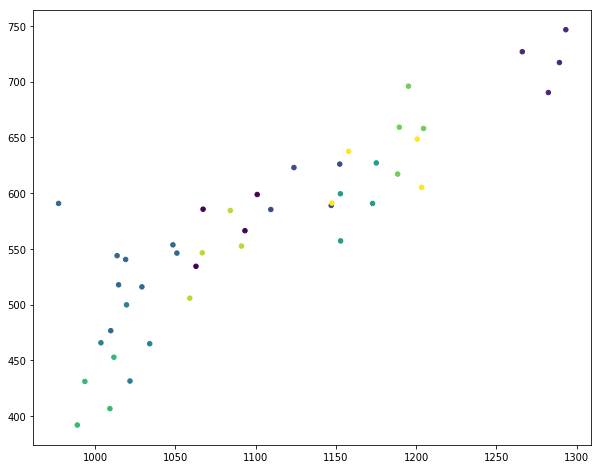

In [65]:
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(tracks[tracks.t==0].x,tracks[tracks.t==0].y,
           c=tracks[tracks.t==0].findex,s=20)

Calculate average position of start points from each embryo and shift to (0,0)

In [75]:
avgpos = tracks.groupby('f')[['x','y']].mean().rename(columns={'x':'xavg','y':'yavg'})
avgpos

,xavg,yavg
f,,
20180108_htl_glc_sc11_mmzm_rotate_brt,1280.539090,664.808244
20180108_htl_glc_sc2_mmzm_wp_rotate_brt,1250.991146,683.164164
20180108_htl_glc_sc9_mmzp_rotate_brt,640.682175,506.318645
20180110_htl_glc-CreateImageSubset-01_sc10_wt_rotate_brt,874.460592,226.181494
20180110_htl_glc-CreateImageSubset-02_sc11_htl_rotate_brt,1059.138286,443.533512
20180110_htl_glc_sc14_mmzp_rotate_brt,1173.814278,534.076384
20180110_htl_glc_sc15_mmzm_rotate_brt,1036.934953,47.678660
20180110_htl_glc_sc6_mmzm_rotate_brt,1079.749194,620.550426
20180112_htlglc_tl_sc11_mmzp_rotate_brt,836.187739,301.807815


In [78]:
tracks = tracks.join(avgpos,on='f')

ValueError: columns overlap but no suffix specified: Index(['xavg', 'yavg'], dtype='object')

In [79]:
tracks.head()

,f,x,y,t,track,name,findex,xavg,yavg
0,20180108_htl_glc_sc11_mmzm_rotate_brt,1100.915678,598.755670,0,0,dt60,0,1280.53909,664.808244
1,20180108_htl_glc_sc11_mmzm_rotate_brt,1100.915678,598.755670,1,0,dt60,0,1280.53909,664.808244
2,20180108_htl_glc_sc11_mmzm_rotate_brt,1088.771472,573.050488,2,0,dt60,0,1280.53909,664.808244
3,20180108_htl_glc_sc11_mmzm_rotate_brt,1070.579972,544.532344,3,0,dt60,0,1280.53909,664.808244
4,20180108_htl_glc_sc11_mmzm_rotate_brt,1075.979244,528.820894,4,0,dt60,0,1280.53909,664.808244


Subtract average position from each x and y

In [80]:
tracks['xpr'] = tracks['x'] - tracks['xavg']
tracks['ypr'] = tracks['y'] - tracks['yavg']

Plot hopefully aligned positions

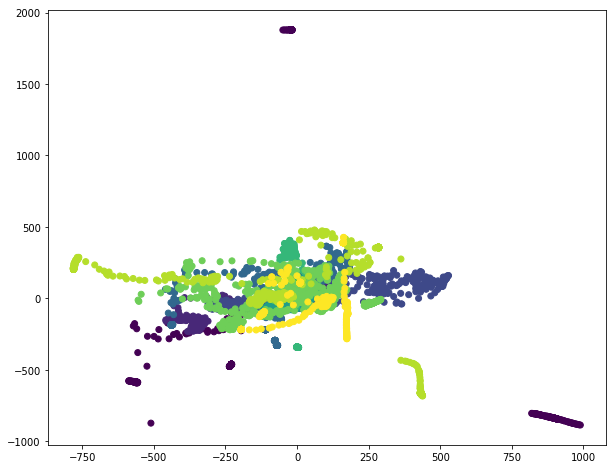

In [82]:
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(tracks.xpr,tracks.ypr,c=tracks.findex)

In [83]:
tracks.track.unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [86]:
tracks.set_index(['track','findex']).index.is_unique

False

In [92]:
tracks.set_index(['track','findex'])

f            x  \
track findex                                                           
0     0           20180108_htl_glc_sc11_mmzm_rotate_brt  1100.915678   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1100.915678   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1088.771472   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1070.579972   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1075.979244   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1076.405471   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1072.378276   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1252.690540   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1251.616616   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1262.913416   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1246.928816   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1239.878816   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1235.753910   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1231.134371   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1245.210185   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1259.682408   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1260.955008   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1259.653428   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1257.986628   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1257.657456   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1258.123266   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1258.697472   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1257.737352   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1257.753024   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1257.701190   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1257.696070   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1257.781696   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1257.972892   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1258.515808   
      0           20180108_htl_glc_sc11_mmzm_rotate_brt  1259.229088   
...                                                 ...          ...   
3     9       20180112_htlglc_tl_sc4_resille_rotate_brt  1051.451802   
      9       20180112_htlglc_tl_sc4_resille_rotate_brt  1051.518153   
      9       20180112_htlglc_tl_sc4_resille_rotate_brt  1051.541718   
      9       20180112_htlglc_tl_sc4_resille_rotate_brt  1051.560226   
      9       20180112_htlglc_tl_sc4_resille_rotate_brt  1051.495677   
      9       20180112_htlglc_tl_sc4_resille_rotate_brt  1051.521217   
      9       20180112_htlglc_tl_sc4_resille_rotate_brt  1051.396584   
      9       20180112_htlglc_tl_sc4_resille_rotate_brt  1051.360714   
      9       20180112_htlglc_tl_sc4_resille_rotate_brt  1051.337381   
      9       20180112_htlglc_tl_sc4_resille_rotate_brt  1051.451429   
      9       20180112_htlglc_tl_sc4_resille_rotate_brt  1051.448977   
      9       20180112_htlglc_tl_sc4_resille_rotate_brt  1051.438550   
      9       20180112_htlglc_tl_sc4_resille_rotate_brt  1051.471803   
      9       20180112_htlglc_tl_sc4_resille_rotate_brt  1051.569092   
      9       20180112_htlglc_tl_sc4_resille_rotate_brt  1051.596273   
      9       20180112_htlglc_tl_sc4_resille_rotate_brt  1051.467637   
      9       20180112_htlglc_tl_sc4_resille_rotate_brt  1051.454084   
      9       20180112_htlglc_tl_sc4_resille_rotate_brt  1051.435269   
      9       20180112_htlglc_tl_sc4_resille_rotate_brt  1051.456330   
      9       20180112_htlglc_tl_sc4_resille_rotate_brt  1051.580469   
      9       20180112_htlglc_tl_sc4_resille_rotate_brt  1051.515572   
      9       20180112_htlglc_tl_sc4_resille_rotate_brt  1051.631431   
      9       20180112_htlglc_tl_sc4_resille_rotate_brt  1051.560893   
      9       20180112

Save tracks for later follow up

In [93]:
tracks.to_csv('20181128-tracking.csv')